In [1]:
import morphs
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pylab as plt
import seaborn as sns
from glob import glob

/usr/local/anaconda/envs/morphs/lib/python2.7/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
accuracies, cluster_accuracies = morphs.data.load.cluster_accuracies()
good_recs = morphs.data.accuracies.good_recs(cluster_accuracies)

In [4]:
block_path = '/mnt/cube/mthielk/analysis/B1101/kwik/Pen01_Lft_AP2500_ML750__Site04_Z2300__B1101_cat_P01_S04_3'
subj = morphs.data.parse.bird_id(block_path)
good_clusters = morphs.data.accuracies.good_clusters(cluster_accuracies[block_path])

In [5]:
spikes = morphs.data.load.ephys_data(block_path, good_clusters=good_clusters, shuffle_endpoints=True)

/usr/local/anaconda/envs/morphs/lib/python2.7/site-packages/pandas/core/indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/usr/local/anaconda/envs/morphs/lib/python2.7/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [6]:
X, labels = morphs.spikes.create_neural_rep(spikes, max_id_len=5)

In [7]:
X_red = morphs.data.neurometric.logistic_dim_reduction(X, labels)

In [9]:
psychometric_params = morphs.data.load.psychometric_params()

In [10]:
behavior_subj = 'B1218'

In [105]:
held_out_df['legend'] = held_out_df['legend'].map({'p_right':'Behavioral (True) values', 'predicted':'Predicted values'})

0       Behavioral (True) values
1       Behavioral (True) values
2       Behavioral (True) values
3       Behavioral (True) values
4       Behavioral (True) values
5       Behavioral (True) values
6       Behavioral (True) values
7       Behavioral (True) values
8       Behavioral (True) values
9       Behavioral (True) values
10      Behavioral (True) values
11      Behavioral (True) values
12      Behavioral (True) values
13      Behavioral (True) values
14      Behavioral (True) values
15      Behavioral (True) values
16      Behavioral (True) values
17      Behavioral (True) values
18      Behavioral (True) values
19      Behavioral (True) values
20      Behavioral (True) values
21      Behavioral (True) values
22      Behavioral (True) values
23      Behavioral (True) values
24      Behavioral (True) values
25      Behavioral (True) values
26      Behavioral (True) values
27      Behavioral (True) values
28      Behavioral (True) values
29      Behavioral (True) values
          

In [129]:
def plot_held_out(labels, representations, behavior_subj, psychometric_params):
    label_df = morphs.data.neurometric.make_label_df(labels, behavior_subj, psychometric_params)
    print 'labeled'
    behavior_df = morphs.data.neurometric.make_behavior_df(behavior_subj, psychometric_params)
    print 'behavior_df'
    merged_df = morphs.data.neurometric._merge_df(label_df, behavior_df)
    print 'merged'
    held_out_df = morphs.data.neurometric.gen_held_out_df(merged_df, representations, melt=True)
    print 'held_out ... now plotting'
    held_out_df['legend'] = held_out_df['legend'].map({'p_right':'Behavioral (True) values', 'predicted':'Predicted values'})
    row_order = held_out_df['lesser_dim'].unique()
    col_order = held_out_df['greater_dim'].unique()
    row_order.sort()
    col_order.sort()
    g = sns.lmplot(x='morph_pos', y='p_right', hue='legend', col='greater_dim', row='lesser_dim', 
                   data=held_out_df, 
                   scatter=True, fit_reg=False,
                   scatter_kws={'alpha': 0.3},
                   row_order=row_order, col_order=col_order)
    g.map_dataframe(plot_4pl, 'morph_pos', 'p_right')
    g.add_legend()
    g = g.set_titles("{row_name}                                 {col_name}")
    g.set(xlim=(0, 128), ylim=(0, 1), xticks=[], yticks=[0.0, 0.5, 1.0]);
    g.set_axis_labels("morph position", "P(right response)");
    
    plt.subplots_adjust(top=0.95)
    g.fig.suptitle(behavior_subj)
    
    return held_out_df, g

labeled
behavior_df
merged
held_out ... now plotting


/usr/local/anaconda/envs/morphs/lib/python2.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  


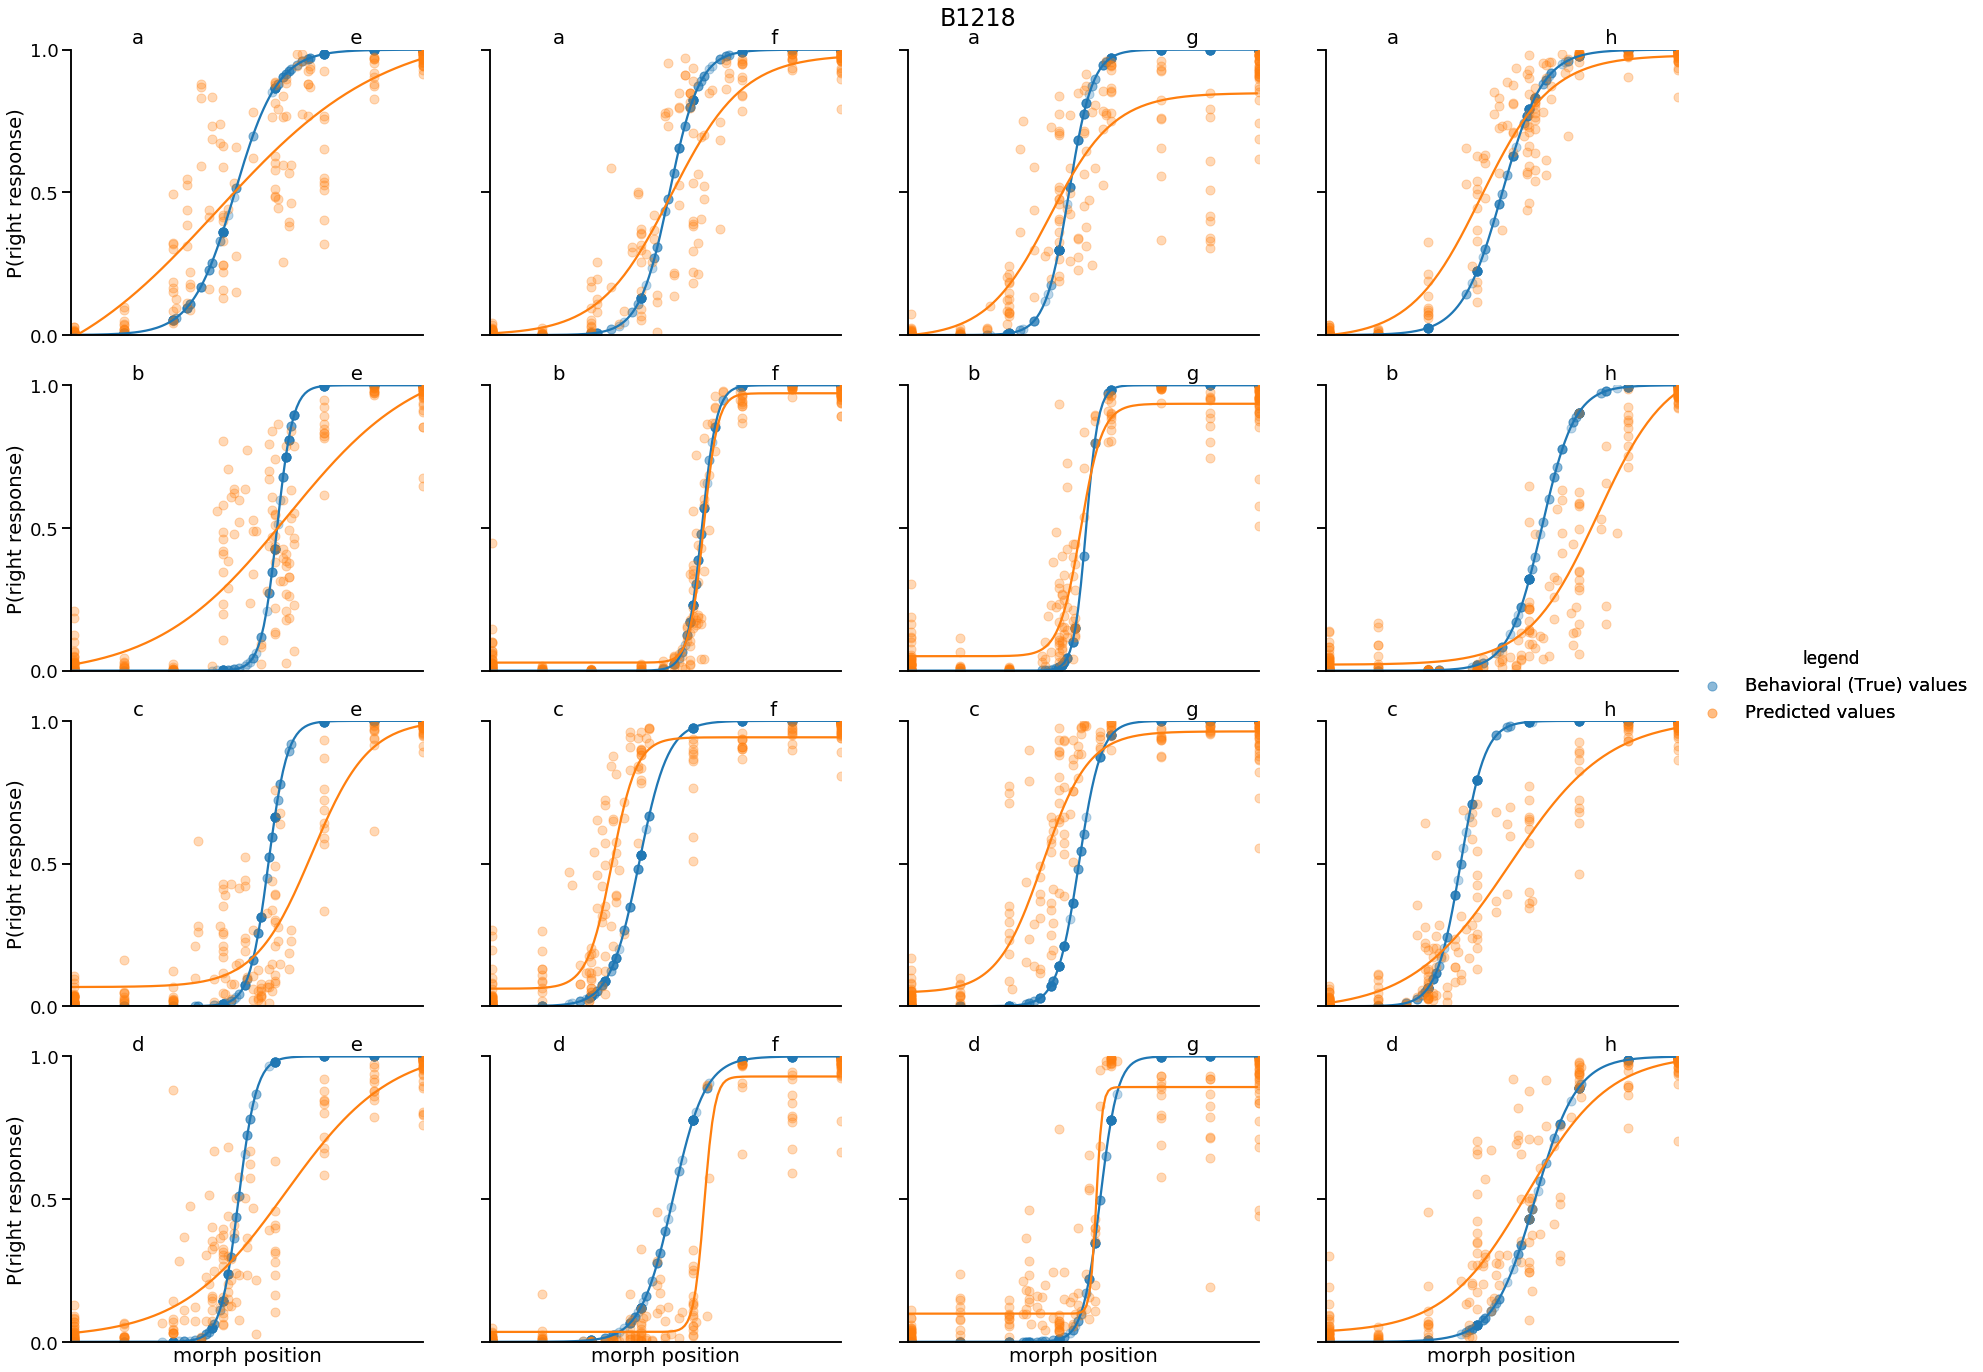

In [130]:
sns.set_context("talk", font_scale=1.1)
held_out_df, g = plot_held_out(labels, X_red, behavior_subj, psychometric_params)

labeled
behavior_df
merged
held_out ... now plotting


/usr/local/anaconda/envs/morphs/lib/python2.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  


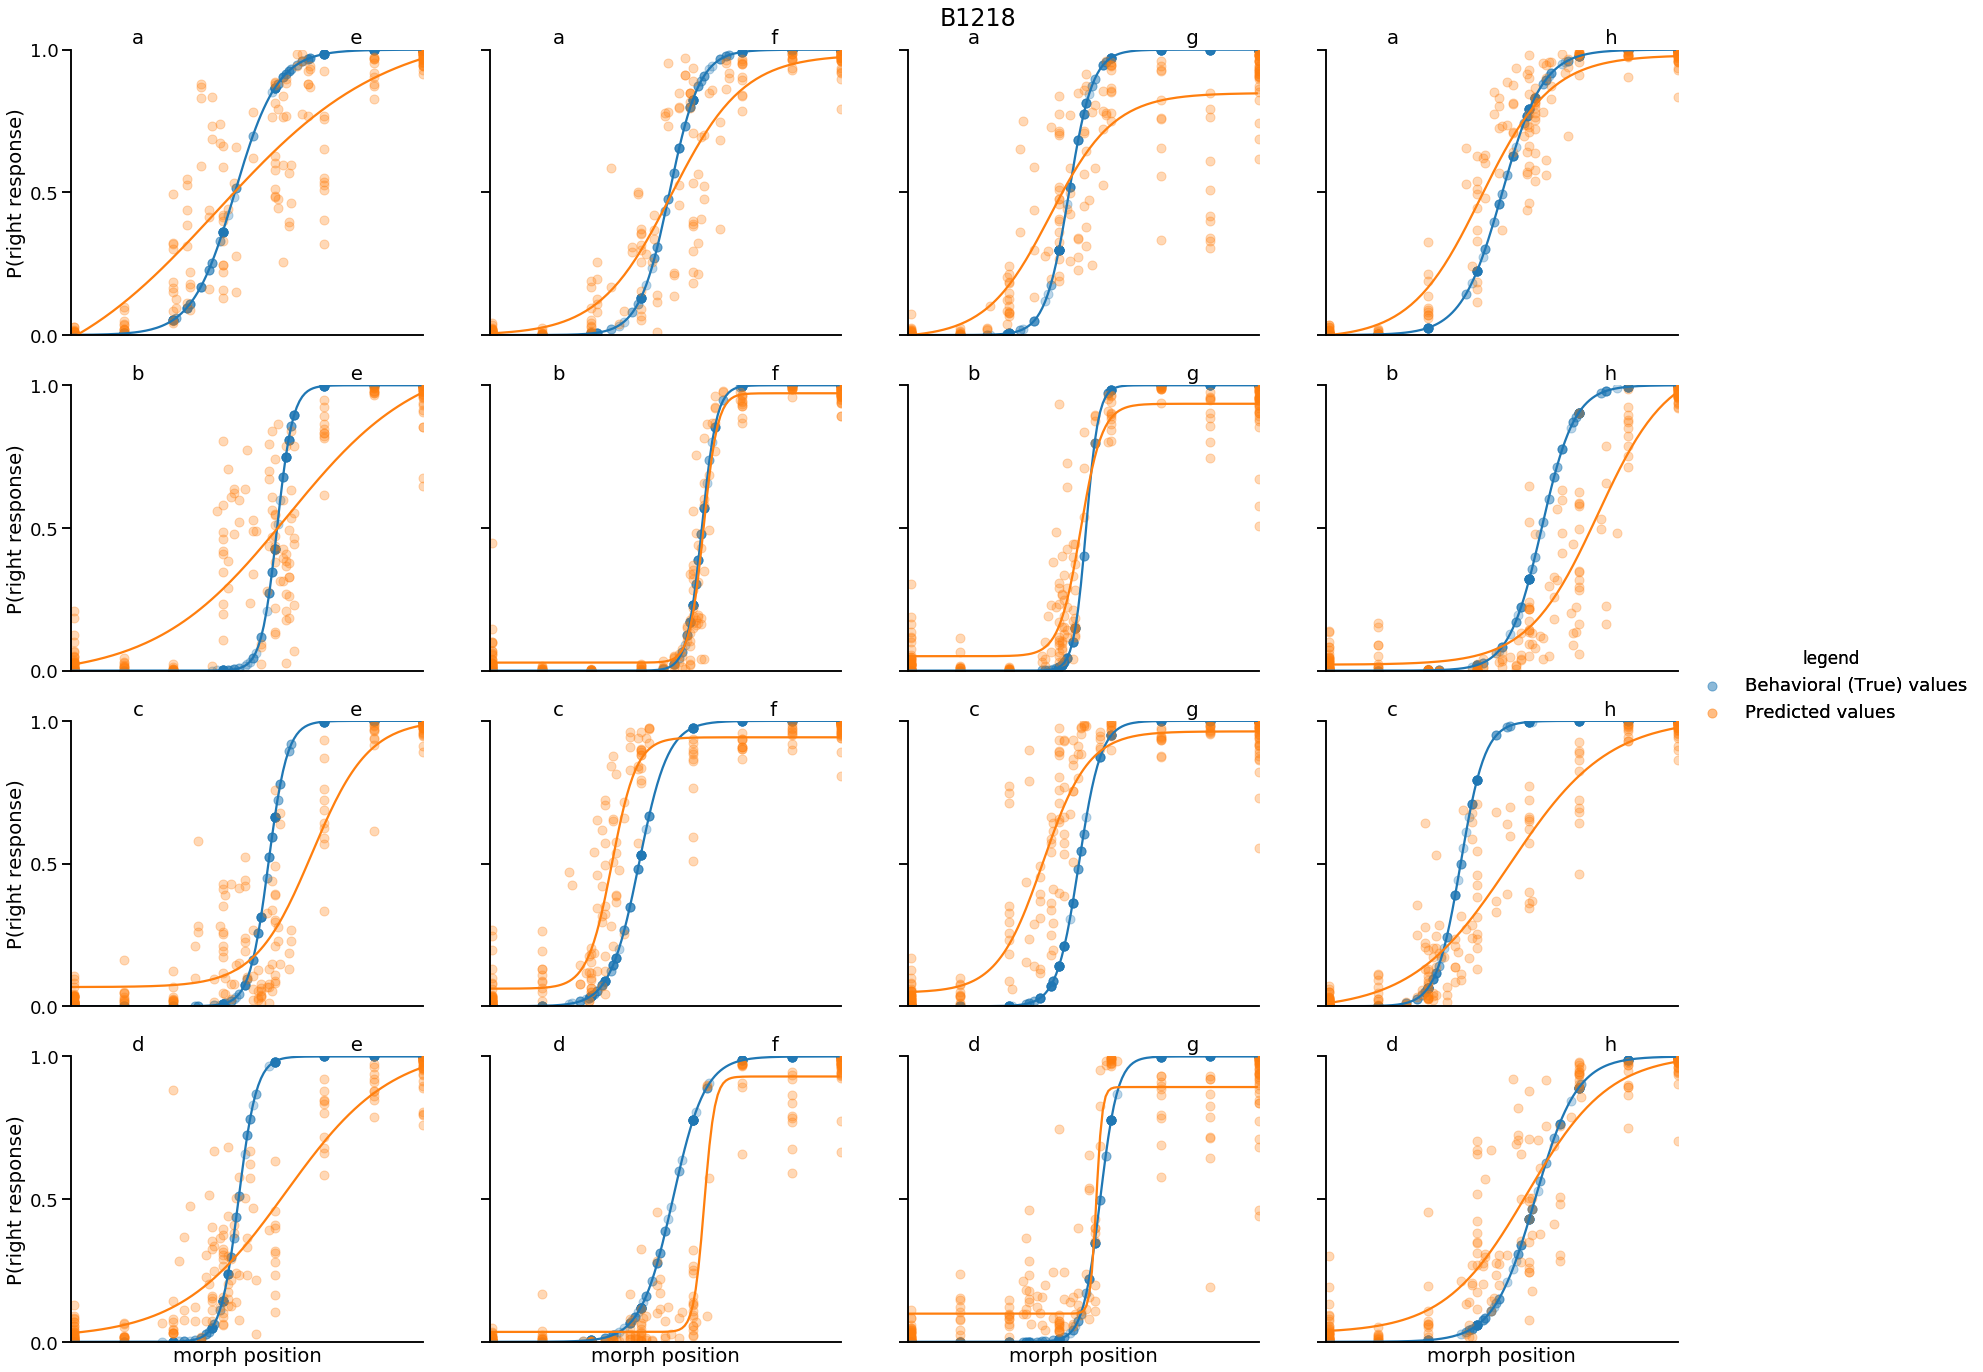

In [128]:
sns.set_context("talk", font_scale=1.1)
held_out_df = plot_held_out(labels, X_red, behavior_subj, psychometric_params)

labeled
behavior_df
merged
held_out ... now plotting


/usr/local/anaconda/envs/morphs/lib/python2.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  


1 loop, best of 3: 616 ms per loop


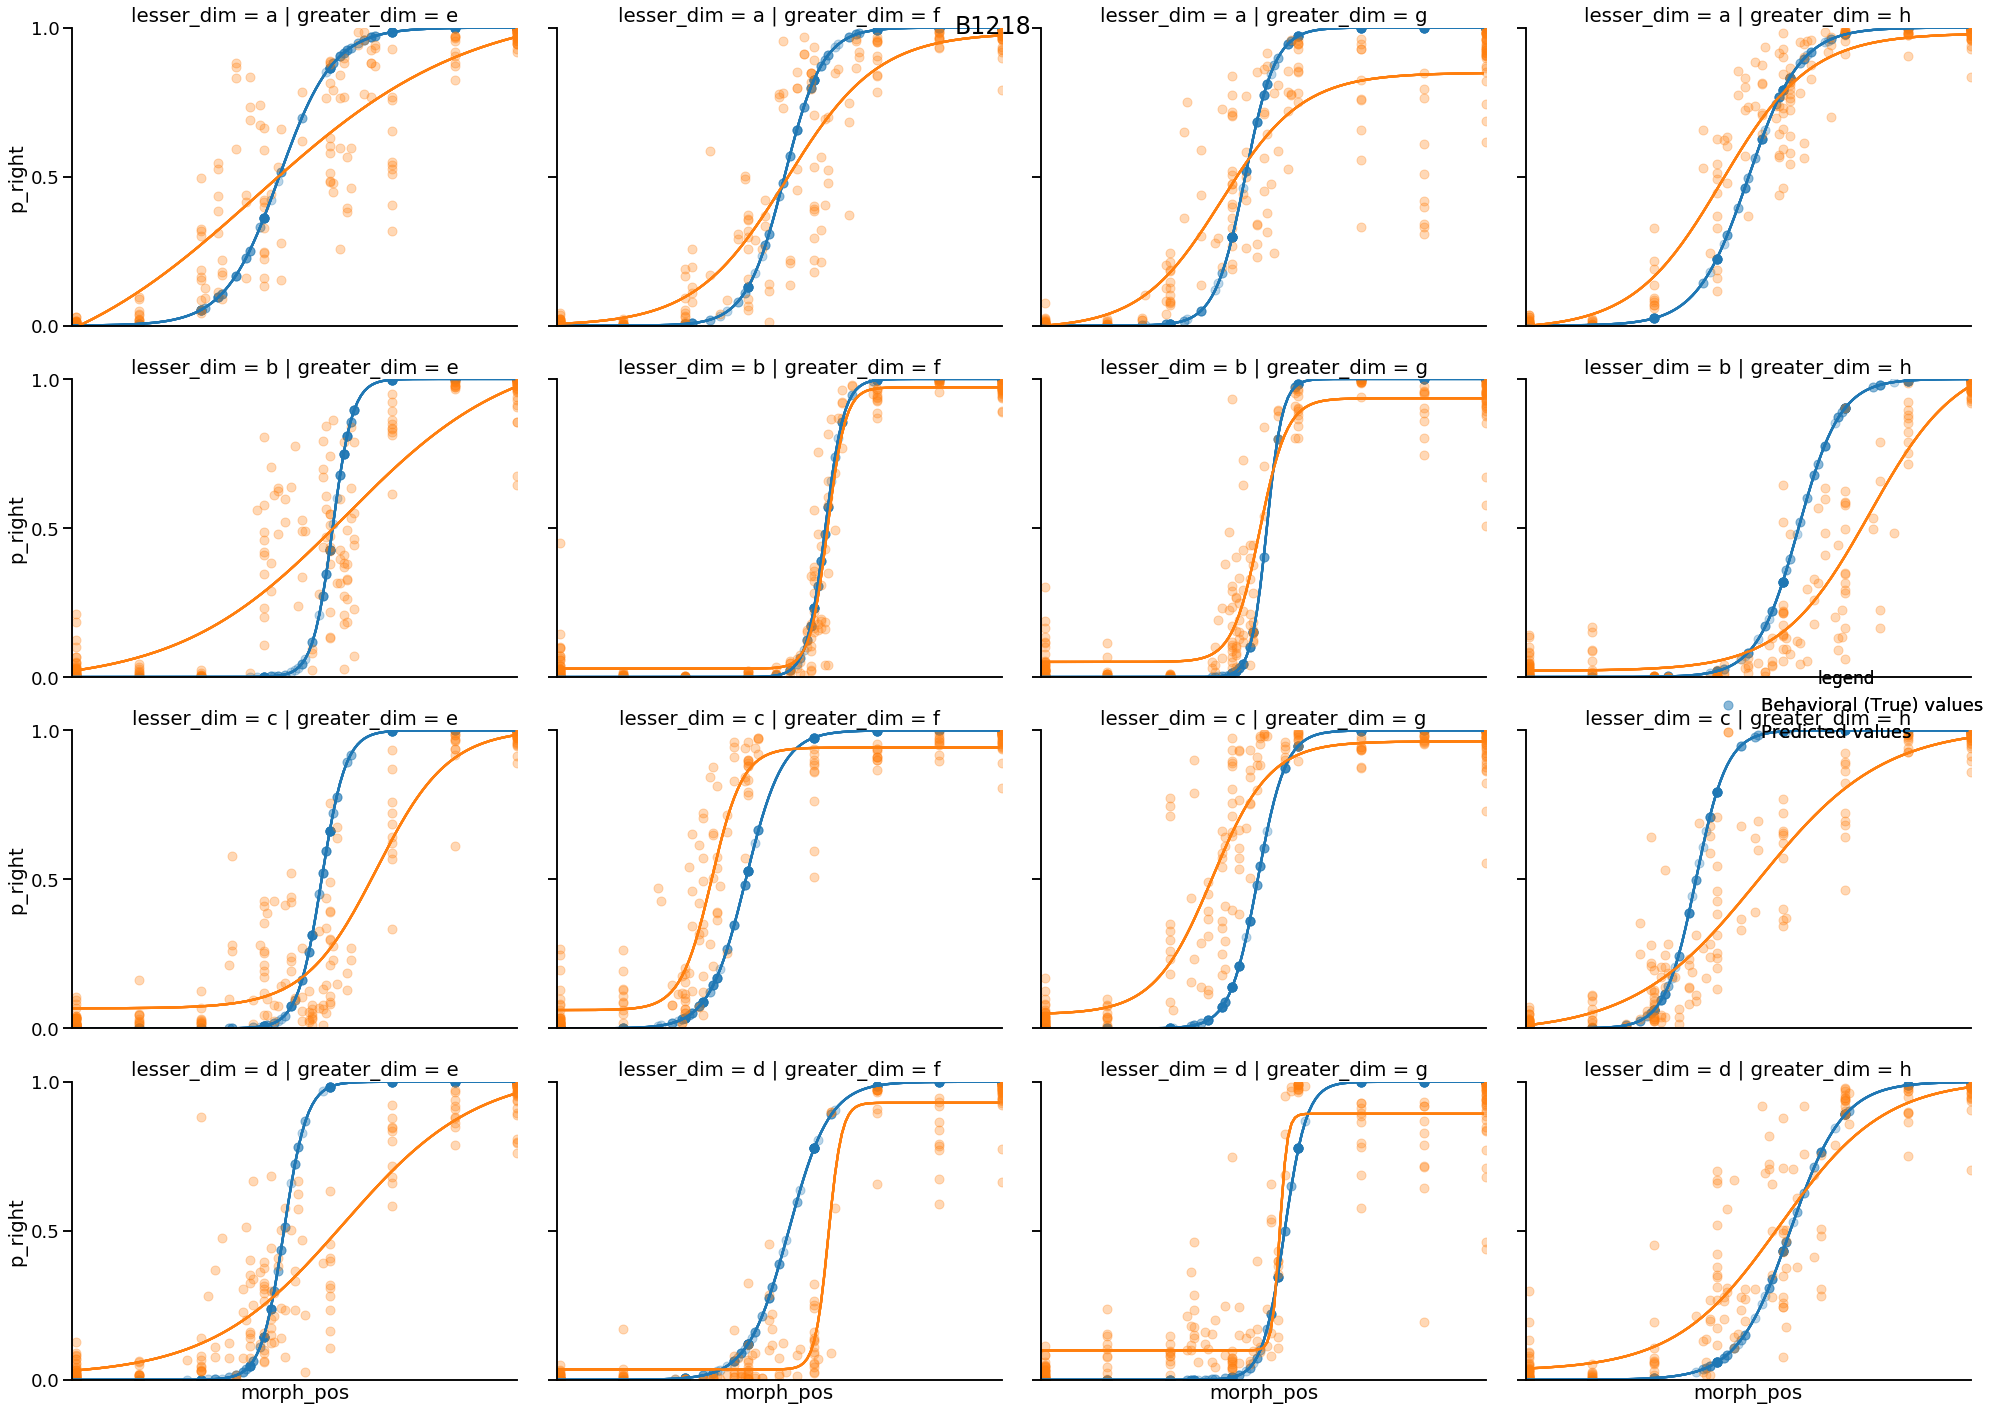

In [132]:
held_out_df, g = plot_held_out(labels, X_red, behavior_subj, psychometric_params)
%timeit g.map_dataframe(plot_4pl, 'morph_pos', 'p_right')

labeled
behavior_df
merged
held_out ... now plotting


/usr/local/anaconda/envs/morphs/lib/python2.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  


1 loop, best of 3: 617 ms per loop


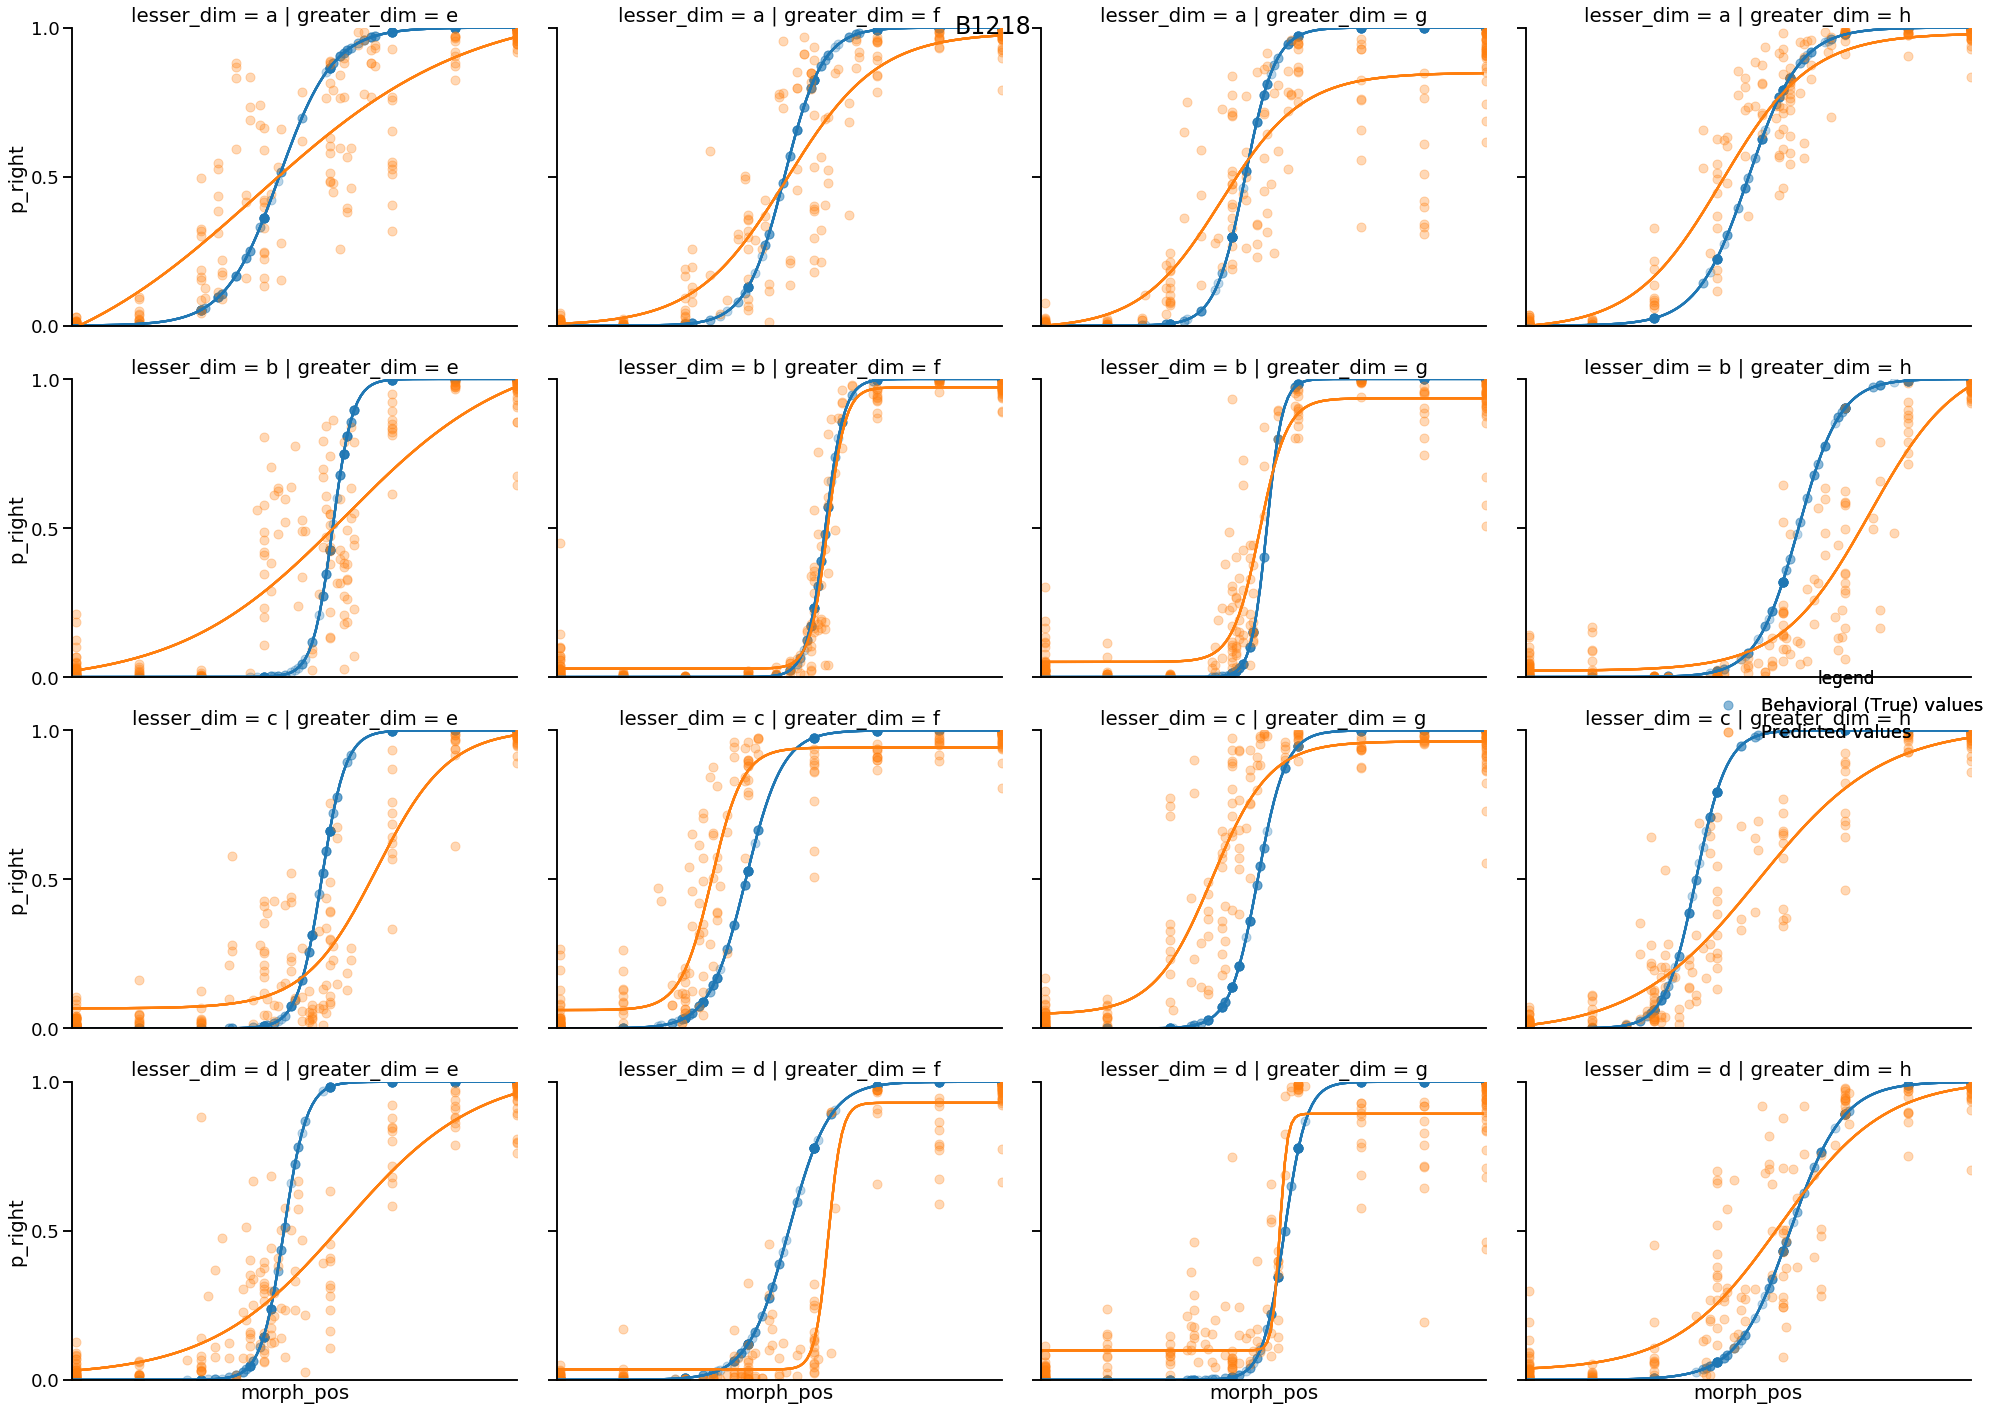

In [133]:
held_out_df, g = plot_held_out(labels, X_red, behavior_subj, psychometric_params)
%timeit g.map_dataframe(plot_4pl, 'morph_pos', 'p_right')

In [63]:
p_start = np.array([psychometric_params[subj][dim] for subj in psychometric_params for dim in psychometric_params[subj]]).mean(axis=0)

In [29]:
import scipy as sp

In [30]:
def curve_fit_4pl(x, A, K, B, M):
    return A + (K - A) / (1 + np.exp(-B * (x - M)))

In [127]:
def plot_4pl(x, y, color=None, **kwargs):
    """helper for lmplot_4pl."""
    data = kwargs.pop("data")
    x = np.array(data[x].tolist())
    y = np.array(data[y].tolist(), dtype='double')

    popt, pcov = sp.optimize.curve_fit(curve_fit_4pl, x, y)
    try:
        result_4pl = morphs.logistic.four_param_logistic(popt)
        t = range(128)
        
        if color is None:
            lines, = plt.plot(x.mean(), y.mean())
            color = lines.get_color()
            lines.remove()
        
        plt.plot(t, result_4pl(t), color=color)
    except TypeError:
        pass
    
def lmplot_4pl(x, y, data, hue=None, col=None, row=None, palette=None,
           col_wrap=None, size=5, aspect=1, markers="o", sharex=True,
           sharey=True, hue_order=None, col_order=None, row_order=None,
           legend=True, legend_out=True, x_estimator=None, x_bins=None,
           x_ci="ci", scatter=True, fit_reg=False, ci=95, n_boot=1000,
           units=None, order=1, logistic=True, lowess=False, robust=False,
           logx=False, x_partial=None, y_partial=None, truncate=False,
           x_jitter=None, y_jitter=None, scatter_kws=None, line_kws=None):
    """lmplot from seaborn modified to plot a 4 parameter logistic
    
    See seaborn documentation for most options
    
    differences:
        set fit_reg=False (default) if you only want to plot 4p-logistic
            and not the standard 2 parameter logistic regression
            
    TODO(Marvin): better package 4pl fit code to be able to just drop in 
        using the built in functions and options
    """

    # Reduce the dataframe to only needed columns
    need_cols = [x, y, hue, col, row, units, x_partial, y_partial]
    cols = np.unique([a for a in need_cols if a is not None]).tolist()
    data = data[cols]

    # Initialize the grid
    facets = sns.FacetGrid(data, row, col, hue, palette=palette,
                       row_order=row_order, col_order=col_order,
                       hue_order=hue_order, size=size, aspect=aspect,
                       col_wrap=col_wrap, sharex=sharex, sharey=sharey,
                       legend_out=legend_out)

    # Add the markers here as FacetGrid has figured out how many levels of the
    # hue variable are needed and we don't want to duplicate that process
    if facets.hue_names is None:
        n_markers = 1
    else:
        n_markers = len(facets.hue_names)
    if not isinstance(markers, list):
        markers = [markers] * n_markers
    if len(markers) != n_markers:
        raise ValueError(("markers must be a singeton or a list of markers "
                          "for each level of the hue variable"))
    facets.hue_kws = {"marker": markers}

    # Hack to set the x limits properly, which needs to happen here
    # because the extent of the regression estimate is determined
    # by the limits of the plot
    if sharex:
        for ax in facets.axes.flat:
            ax.scatter(data[x], np.ones(len(data)) * data[y].mean()).remove()

    # Draw the regression plot on each facet
    regplot_kws = dict(
        x_estimator=x_estimator, x_bins=x_bins, x_ci=x_ci,
        scatter=scatter, fit_reg=fit_reg, ci=ci, n_boot=n_boot, units=units,
        order=order, logistic=logistic, lowess=lowess, robust=robust,
        logx=logx, x_partial=x_partial, y_partial=y_partial, truncate=truncate,
        x_jitter=x_jitter, y_jitter=y_jitter,
        scatter_kws=scatter_kws, line_kws=line_kws,
        )
    facets.map_dataframe(plot_4pl, x, y, **regplot_kws)
    facets.map_dataframe(sns.regplot, x, y, **regplot_kws)

    # Add a legend
    if legend and (hue is not None) and (hue not in [col, row]):
        facets.add_legend()
    return facets